In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, auc, roc_curve, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from utils import compute_accuracy, compute_auc 

In [52]:
# Tests for compute_accuracy
assert compute_accuracy(np.array([1, 1, 0, 0]), np.array([1, 1, 0, 0])) == 1
assert compute_accuracy(np.array([1, 1, 0, 0]), np.array([1, 0, 1, 1])) == 1/4
assert compute_accuracy(np.array([1, 1, 0, 0]), np.array([1, 0, 0, 1])) == 1/2
assert compute_accuracy(np.array([1, 1, 0, 0]), np.array([1, 1, 0, 1])) == 3/4
print("Accuracy tests passed")

Accuracy tests passed


In [51]:
# Test for compute_auc
assert compute_auc(np.array([1, 1, 0, 0]), np.array([1, 0.9, 0.2, 0.1])) == 1
assert compute_auc(np.array([1, 0, 0, 0]), np.array([0.1, 0.02, 0.01, 0])) == 1
assert 0 <= compute_auc(np.array([1, 1, 0, 0]), np.array([1, 0.2, 0.5, 0.6])) <= 1
assert 0 <= compute_auc(np.array([1, 1, 0, 0]), np.array([0.1, 0.2, 0.5, 0.6])) <= 1
print("AUC tests passed")

AUC tests passed


In [31]:
pd.set_option('display.max_columns', None)

In [32]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=["TotalCharges"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [33]:
numeric = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
catagorical = df.drop(columns=['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'])

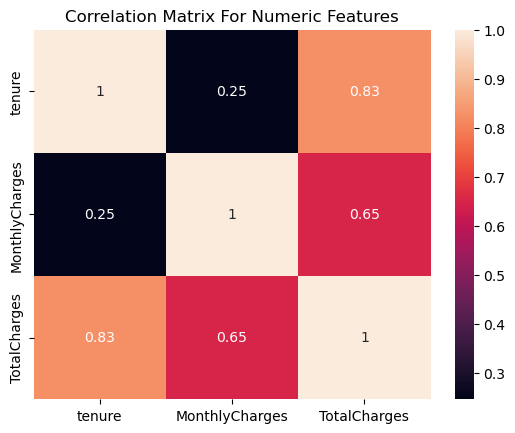

In [34]:
plt.title("Correlation Matrix For Numeric Features")
sns.heatmap(numeric.corr(), annot=True);

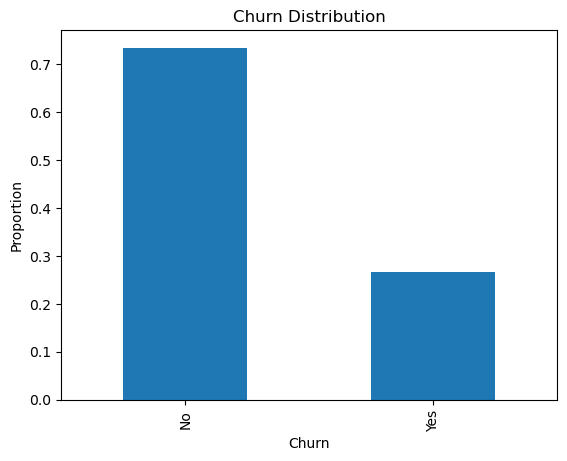

In [35]:
df["Churn"].value_counts(normalize=True).plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Proportion");

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


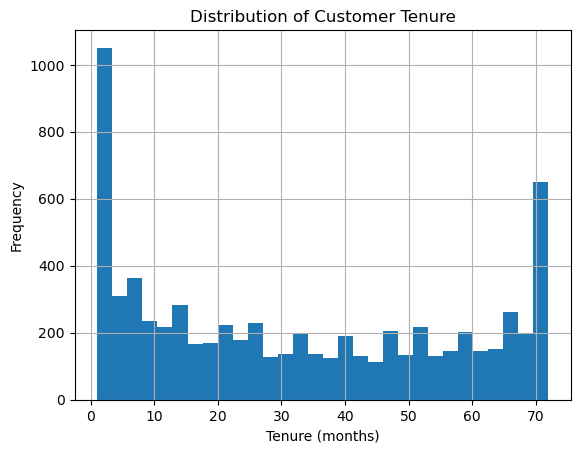

In [36]:
print(df["tenure"].describe())
df["tenure"].hist(bins=30)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency");

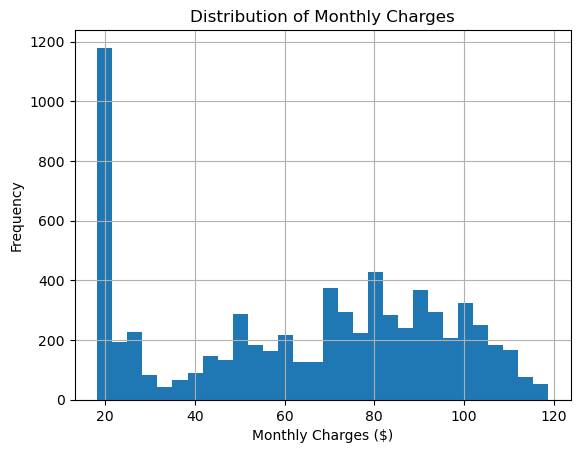

In [37]:
df["MonthlyCharges"].describe()
df["MonthlyCharges"].hist(bins=30)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Frequency");

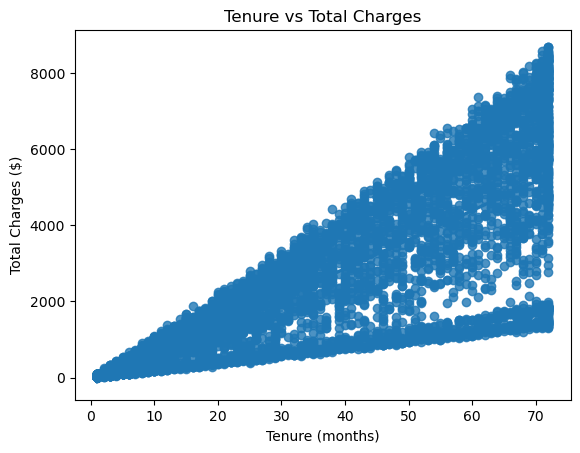

In [38]:
sns.regplot(data=df, x="tenure", y="TotalCharges")
plt.title("Tenure vs Total Charges")
plt.xlabel("Tenure (months)")
plt.ylabel("Total Charges ($)");

In [39]:
df["gender"].value_counts(normalize=True)

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

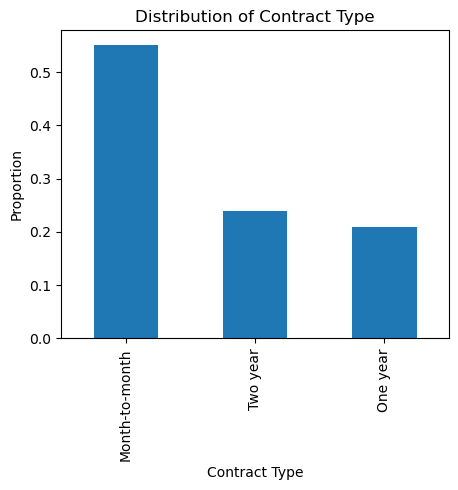

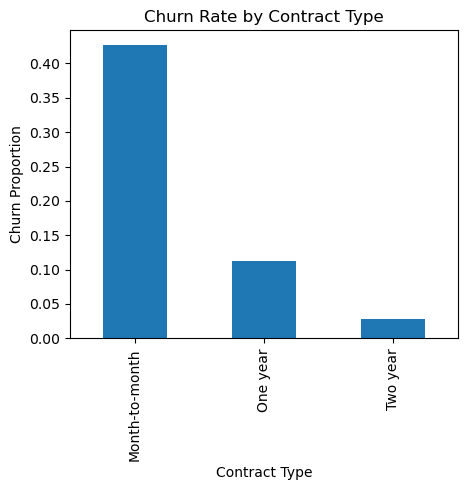

In [40]:
plt.figure(figsize=(5,4))
catagorical["Contract"].value_counts(normalize=True).plot(kind="bar")
plt.title("Distribution of Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Proportion")
plt.show()


df["Churn_num"] = df["Churn"].map({"No":0, "Yes":1})
plt.figure(figsize=(5,4))
df.groupby("Contract")["Churn_num"].mean().plot(kind="bar")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Proportion")
plt.show()

<Figure size 600x400 with 0 Axes>

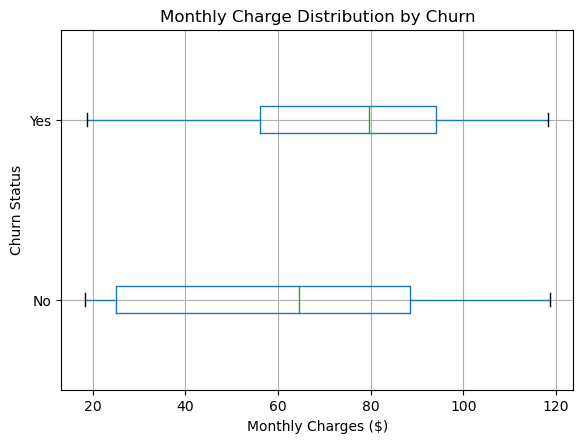

In [41]:
plt.figure(figsize=(6,4))
df.boxplot(column="MonthlyCharges", by="Churn", vert=False)
plt.title("Monthly Charge Distribution by Churn")
plt.suptitle("")  
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Churn Status")
plt.show();

<Figure size 600x400 with 0 Axes>

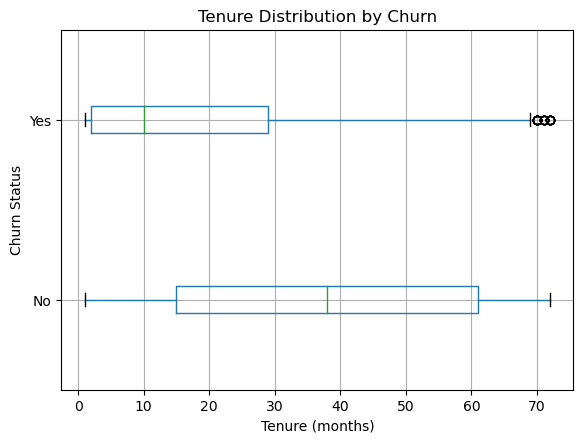

In [42]:
plt.figure(figsize=(6,4))
df.boxplot(column="tenure", by="Churn", vert=False)
plt.title("Tenure Distribution by Churn")
plt.suptitle("") 
plt.xlabel("Tenure (months)")
plt.ylabel("Churn Status")
plt.show()

In [43]:
X = df.drop(columns=["customerID", "Churn", "Churn_num"])
X = pd.get_dummies(X, drop_first=True)
y = df["Churn_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [44]:
logistic_model = LogisticRegression(max_iter=2000).fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_model_acc = compute_accuracy(y_test, y_pred_logistic) 
print(f'Logistic Regression Test Accuracy: {logistic_model_acc:.4f}')

Logistic Regression Test Accuracy: 0.7967


In [45]:
assert logistic_model.classes_[1] == 1
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
logistic_model_auc = compute_auc(y_test, y_prob_logistic) 
print(f'Logistic Regression Test AUC: {logistic_model_auc:.4f}')

Logistic Regression Test AUC: 0.8305


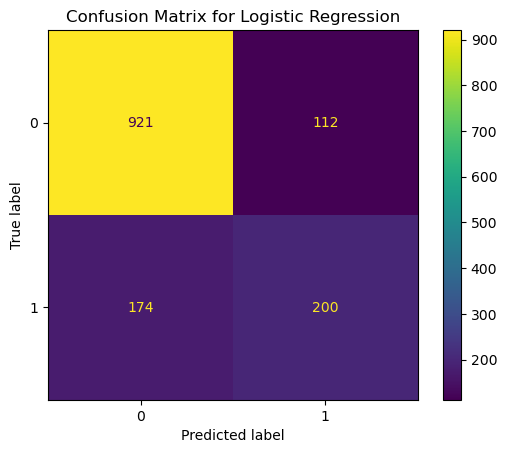

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

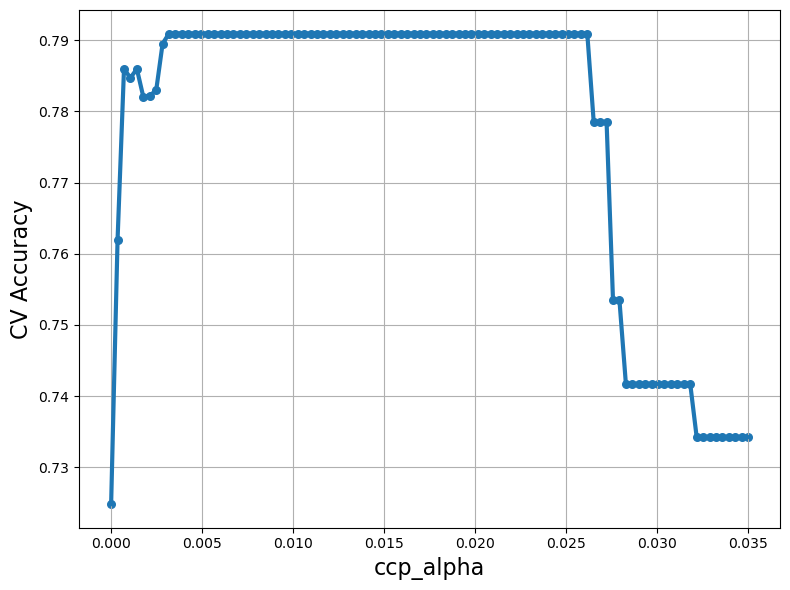

CV CART Test Accuracy: 0.7818
Best ccp_alpha: 0.0032


In [47]:
classification_tree = DecisionTreeClassifier(random_state=88)

grid_values = {'ccp_alpha': np.linspace(0, 0.035, 100)}
cv = KFold(n_splits=5, random_state=88, shuffle=True)

classification_tree_cv = GridSearchCV(classification_tree, param_grid=grid_values, \
                                      scoring='accuracy', cv=cv, verbose=0)
classification_tree_cv.fit(X_train, y_train)

ccp_alphas = classification_tree_cv.cv_results_['param_ccp_alpha'].data.astype(float)
accuracy_scores = classification_tree_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alphas, accuracy_scores, s=30)
plt.plot(ccp_alphas, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

classification_tree = classification_tree_cv.best_estimator_
y_pred_tree = classification_tree.predict(X_test)

tree_acc = compute_accuracy(y_test, y_pred_tree)
tree_best_ccp_alpha = classification_tree_cv.best_params_['ccp_alpha'] 
print(f'CV CART Test Accuracy: {tree_acc:.4f}')
print(f'Best ccp_alpha: {tree_best_ccp_alpha:.4f}')

In [48]:
assert classification_tree.classes_[1] == 1
y_prob_tree = classification_tree.predict_proba(X_test)[:, 1]
tree_model_auc = compute_auc(y_test, y_prob_tree)
print(f'Classification Tree Test AUC: {tree_model_auc:.4f}')

Classification Tree Test AUC: 0.7937


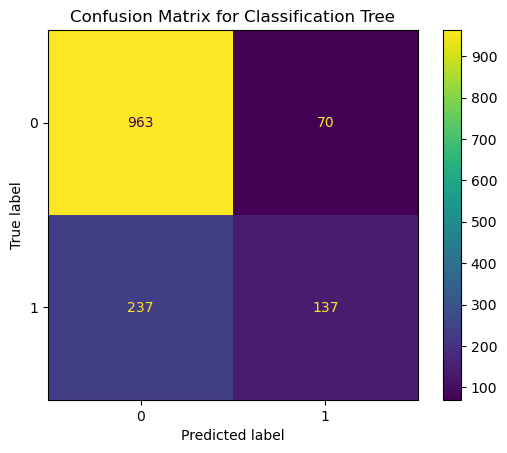

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
plt.title("Confusion Matrix for Classification Tree")
plt.show()